In [2]:
import pandas as pd 
import numpy as np 

# parameters

>> study habits, subject preferences, course difficulty, and past 
performance

In [3]:
# study habits -> daily, weekend or certain days
# hrs studied 

# subjects studied(preferences)

# course difficulty 

# past performance

In [4]:
import numpy as np
import pandas as pd

# For reproducibility
np.random.seed(42)

n = 100000

# Generate features based on observed ranges
subject_difficulty = np.random.choice([1,2, 3, 4, 5], size=n)
past_performance = np.random.randint(10, 100, size=n) 
preferred_hours = np.random.choice([1, 2, 3, 4,5], size=n)

# Generate target variable using a linear relation with noise
noise = np.random.normal(0, 1, size=n)
optimal_study_hours = np.round(subject_difficulty + preferred_hours + (70 - past_performance)/10 + noise).astype(int)

# Ensure no negative or zero study hours
optimal_study_hours = np.where(optimal_study_hours < 1, 1, optimal_study_hours)

optimal_study_hours = np.where(optimal_study_hours > 5, 5,optimal_study_hours)

# Create DataFrame
df = pd.DataFrame({
    'subject_difficulty': subject_difficulty,
    'past_performance': past_performance,
    'preferred_hours': preferred_hours,
    'optimal_study_hours': optimal_study_hours
})


In [5]:
df.optimal_study_hours.unique()

array([3, 5, 4, 2, 1])

In [6]:
df

,subject_difficulty,past_performance,preferred_hours,optimal_study_hours
0,4,91,3,3
1,5,68,2,5
2,3,31,4,5
3,5,69,5,5
4,5,79,1,5
...,...,...,...,...
99995,2,97,1,1
99996,1,60,2,5
99997,5,71,1,5
99998,4,30,2,5


In [7]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

In [8]:
df.columns

Index(['subject_difficulty', 'past_performance', 'preferred_hours',
       'optimal_study_hours'],
      dtype='object')

In [9]:
X = df[['subject_difficulty', 'past_performance', 'preferred_hours']]

In [10]:
y = df.optimal_study_hours

In [11]:
y

0        3
1        5
2        5
3        5
4        5
        ..
99995    1
99996    5
99997    5
99998    5
99999    2
Name: optimal_study_hours, Length: 100000, dtype: int64

In [12]:
rf_regressor = RandomForestRegressor(n_estimators=500,random_state=1)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=1)

In [13]:
rf_regressor.fit(X_train,y_train)

RandomForestRegressor(n_estimators=500, random_state=1)

In [14]:
y_pred_rf = rf_regressor.predict(X_test)

In [15]:
r2_score(y_test,y_pred_rf)

0.7899685902713142

In [16]:
mean_absolute_error(y_test,y_pred_rf)

0.20451763225092853

In [17]:
rf_regressor.predict([[2,68,3]])

d:\ML_Study_Planner\dependencies\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([4.81076381])

In [18]:
def generate_study_schedule(subjects, difficulties, preferred_hours, previous_performance):
    input_data = pd.DataFrame({
        'subject_difficulty': difficulties,
        'past_performance': previous_performance,
        'preferred_hours': preferred_hours
        
    })
    
    predicted_hours = rf_regressor.predict(input_data)
    
    schedule = "Your Personalized Study Schedule:\n"
    for sub, hours in zip(subjects, predicted_hours):
        schedule += f"- Study {sub} for {round(hours, 1)} hours.\n"
    
    return schedule

# Example usage
subjects = ['Math', 'Physics', 'History']
difficulties = [2,3,5]
preferred_hours = [5, 4, 2]
previous_performance = [70, 80, 90]


print(generate_study_schedule(subjects, difficulties, preferred_hours, previous_performance))


Your Personalized Study Schedule:
- Study Math for 5.0 hours.
- Study Physics for 4.9 hours.
- Study History for 4.5 hours.



In [19]:
import pandas as pd
import numpy as np

def generate_study_schedule(subjects, difficulties, preferred_hours, previous_performance, total_hours):
    # Normalize difficulty and performance to get weightage
    difficulty_weight = np.array(difficulties) / sum(difficulties)
    performance_weight = (100 - np.array(previous_performance)) / sum(100 - np.array(previous_performance))

    # Combine difficulty and performance importance
    total_weight = 0.5 * difficulty_weight + 0.5 * performance_weight

    # Allocate total hours based on weight
    allocated_hours = total_weight * total_hours

    # Generate schedule
    schedule = "Your Personalized Study Schedule:\n"
    for sub, hours in zip(subjects, allocated_hours):
        schedule += f"- Study {sub} for {round(hours, 1)} hours.\n"
    
    return schedule

# Example usage
subjects = ['Math', 'Physics', 'History','Calculus']
difficulties = [2, 3, 5,5]  # Higher value means harder subject
preferred_hours = [5, 4, 2,4]  # Not directly used, but could be incorporated
previous_performance = [70, 80, 90,70]  # Higher score means better performance
total_hours = 12  # Total hours available for studying

print(generate_study_schedule(subjects, difficulties, preferred_hours, previous_performance, total_hours))


Your Personalized Study Schedule:
- Study Math for 2.8 hours.
- Study Physics for 2.5 hours.
- Study History for 2.7 hours.
- Study Calculus for 4.0 hours.



In [20]:
import numpy as np

def generate_study_schedule(subjects, difficulties, previous_performance, total_days, hours_per_day):
    total_hours = total_days * hours_per_day  # Compute total study hours

    # Normalize difficulty and performance to get weightage
    difficulty_weight = np.array(difficulties) / sum(difficulties)
    performance_weight = (100 - np.array(previous_performance)) / sum(100 - np.array(previous_performance))

    # Combine difficulty and performance importance
    total_weight = 0.5 * difficulty_weight + 0.5 * performance_weight

    # Allocate total study hours based on weight
    allocated_hours = total_weight * total_hours

    # Split hours across days
    hours_per_subject_per_day = allocated_hours / total_days  

    # Generate schedule
    schedule = "📅 **Your Personalized Study Plan:**\n"
    for day in range(1, total_days + 1):
        schedule += f"\n📆 **Day {day}:**\n"
        for sub, hours in zip(subjects, hours_per_subject_per_day):
            schedule += f"   - Study **{sub}** for **{round(hours, 1)}** hours.\n"

    return schedule

# Example usage
subjects = ['Math', 'Physics', 'History', 'Calculus']
difficulties = [2, 3, 5, 5]  # Higher value means harder subject
previous_performance = [70, 80, 90, 70]  # Higher score means better past performance
total_days = 7  # Total study days
hours_per_day = 12  # Study hours available per day

print(generate_study_schedule(subjects, difficulties, previous_performance, total_days, hours_per_day))


📅 **Your Personalized Study Plan:**

📆 **Day 1:**
   - Study **Math** for **2.8** hours.
   - Study **Physics** for **2.5** hours.
   - Study **History** for **2.7** hours.
   - Study **Calculus** for **4.0** hours.

📆 **Day 2:**
   - Study **Math** for **2.8** hours.
   - Study **Physics** for **2.5** hours.
   - Study **History** for **2.7** hours.
   - Study **Calculus** for **4.0** hours.

📆 **Day 3:**
   - Study **Math** for **2.8** hours.
   - Study **Physics** for **2.5** hours.
   - Study **History** for **2.7** hours.
   - Study **Calculus** for **4.0** hours.

📆 **Day 4:**
   - Study **Math** for **2.8** hours.
   - Study **Physics** for **2.5** hours.
   - Study **History** for **2.7** hours.
   - Study **Calculus** for **4.0** hours.

📆 **Day 5:**
   - Study **Math** for **2.8** hours.
   - Study **Physics** for **2.5** hours.
   - Study **History** for **2.7** hours.
   - Study **Calculus** for **4.0** hours.

📆 **Day 6:**
   - Study **Math** for **2.8** hours.
   - Study 

In [21]:
import numpy as np

def generate_study_schedule(subjects, difficulties, previous_performance, total_days, hours_per_day_list):
    if len(hours_per_day_list) != total_days:
        raise ValueError("The length of hours_per_day_list must match total_days")

    total_hours = sum(hours_per_day_list)  # Compute total study hours

    # Normalize difficulty and performance to get weightage
    difficulty_weight = np.array(difficulties) / sum(difficulties)
    performance_weight = (100 - np.array(previous_performance)) / sum(100 - np.array(previous_performance))

    # Combine difficulty and performance importance
    total_weight = 0.5 * difficulty_weight + 0.5 * performance_weight

    # Allocate total study hours based on weight
    allocated_hours = total_weight * total_hours

    # Generate schedule
    schedule = "📅 **Your Personalized Study Plan:**\n"
    for day, daily_hours in enumerate(hours_per_day_list, start=1):
        day_weight = daily_hours / total_hours  # Proportion of study time for the day
        daily_allocated_hours = allocated_hours * day_weight  # Adjust subject hours based on the day's hours

        schedule += f"\n📆 **Day {day} (Total: {daily_hours} hours):**\n"
        for sub, hours in zip(subjects, daily_allocated_hours):
            schedule += f"   - Study **{sub}** for **{round(hours, 1)}** hours.\n"

    return schedule

# Example usage
subjects = ['Math', 'Physics', 'History', 'Calculus']
difficulties = [2, 3, 5, 5]  # Higher value means harder subject
previous_performance = [70, 80, 90, 70]  # Higher score means better past performance
total_days = 10 # Total study days
hours_per_day_list = [3,4,10,12,10,10,8,7,8,10]  # Different hours per day

print(generate_study_schedule(subjects, difficulties, previous_performance, total_days, hours_per_day_list))


📅 **Your Personalized Study Plan:**

📆 **Day 1 (Total: 3 hours):**
   - Study **Math** for **0.7** hours.
   - Study **Physics** for **0.6** hours.
   - Study **History** for **0.7** hours.
   - Study **Calculus** for **1.0** hours.

📆 **Day 2 (Total: 4 hours):**
   - Study **Math** for **0.9** hours.
   - Study **Physics** for **0.8** hours.
   - Study **History** for **0.9** hours.
   - Study **Calculus** for **1.3** hours.

📆 **Day 3 (Total: 10 hours):**
   - Study **Math** for **2.3** hours.
   - Study **Physics** for **2.1** hours.
   - Study **History** for **2.2** hours.
   - Study **Calculus** for **3.3** hours.

📆 **Day 4 (Total: 12 hours):**
   - Study **Math** for **2.8** hours.
   - Study **Physics** for **2.5** hours.
   - Study **History** for **2.7** hours.
   - Study **Calculus** for **4.0** hours.

📆 **Day 5 (Total: 10 hours):**
   - Study **Math** for **2.3** hours.
   - Study **Physics** for **2.1** hours.
   - Study **History** for **2.2** hours.
   - Study **Calcul

d:\ML_Study_Planner\dependencies\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


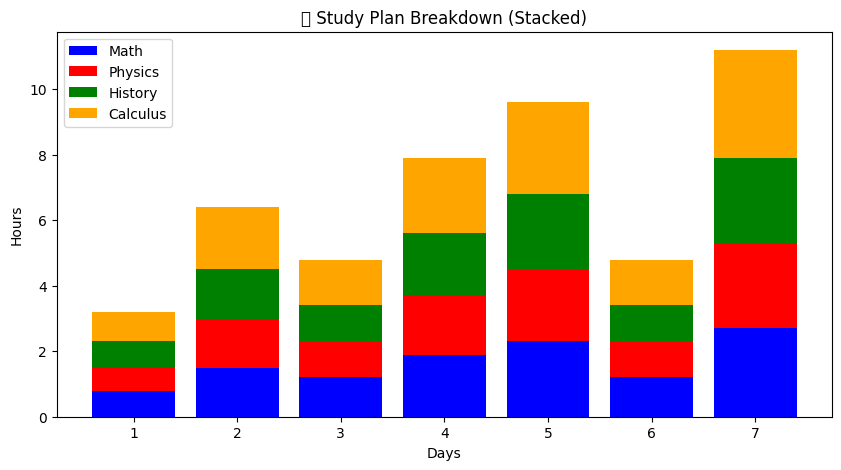

d:\ML_Study_Planner\dependencies\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


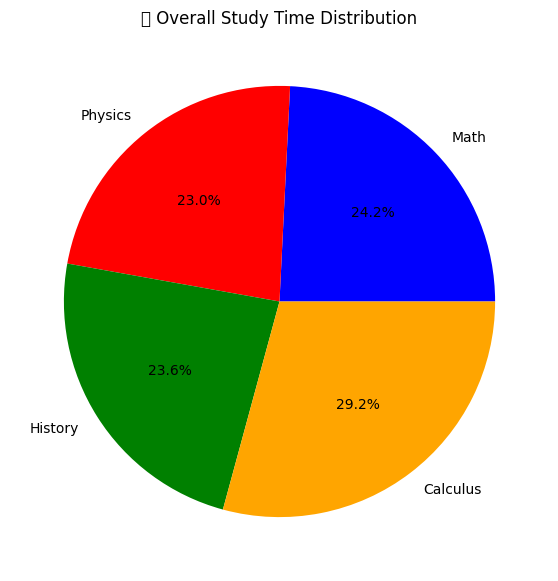

📅 **Your Personalized Study Plan:**

📆 **Day 1 (Total: 2 hours):**
   - Study **Math** for **0.8** hours.
   - Study **Physics** for **0.7** hours.
   - Study **History** for **0.8** hours.
   - Study **Calculus** for **0.9** hours.
   - ⏸️ Take a break every 2 hours for 15 minutes!

📆 **Day 2 (Total: 4 hours):**
   - Study **Math** for **1.5** hours.
   - Study **Physics** for **1.5** hours.
   - Study **History** for **1.5** hours.
   - Study **Calculus** for **1.9** hours.
   - ⏸️ Take a break every 2 hours for 15 minutes!

📆 **Day 3 (Total: 3 hours):**
   - Study **Math** for **1.2** hours.
   - Study **Physics** for **1.1** hours.
   - Study **History** for **1.1** hours.
   - Study **Calculus** for **1.4** hours.
   - ⏸️ Take a break every 2 hours for 15 minutes!

📆 **Day 4 (Total: 5 hours):**
   - Study **Math** for **1.9** hours.
   - Study **Physics** for **1.8** hours.
   - Study **History** for **1.9** hours.
   - Study **Calculus** for **2.3** hours.
   - ⏸️ Take a break ev

In [22]:
import numpy as np
import matplotlib.pyplot as plt

def generate_study_schedule(subjects, difficulties, previous_performance, total_days, hours_per_day_list):
    if len(hours_per_day_list) != total_days:
        raise ValueError("The length of hours_per_day_list must match total_days")

    total_hours = sum(hours_per_day_list)  # Compute total study hours

    # Normalize difficulty and performance to get weightage
    difficulty_weight = np.array(difficulties) / sum(difficulties)
    performance_weight = (100 - np.array(previous_performance)) / sum(100 - np.array(previous_performance))

    # Combine difficulty and performance importance
    total_weight = 0.4 * difficulty_weight + 0.4 * performance_weight + 0.2  # Extra weight for weaker subjects

    # Allocate total study hours based on weight
    allocated_hours = total_weight * total_hours

    # Initialize study plan
    study_plan = {day: {} for day in range(1, total_days + 1)}

    # Assign study hours for each day
    for day, daily_hours in enumerate(hours_per_day_list, start=1):
        day_weight = daily_hours / total_hours  # Proportion of study time for the day
        daily_allocated_hours = allocated_hours * day_weight  # Adjust subject hours based on the day's hours
        
        study_plan[day] = {sub: round(hours, 1) for sub, hours in zip(subjects, daily_allocated_hours)}

    # Generate textual schedule
    schedule = "📅 **Your Personalized Study Plan:**\n"
    for day, subjects_hours in study_plan.items():
        schedule += f"\n📆 **Day {day} (Total: {hours_per_day_list[day-1]} hours):**\n"
        for sub, hours in subjects_hours.items():
            schedule += f"   - Study **{sub}** for **{hours}** hours.\n"
        schedule += "   - ⏸️ Take a break every 2 hours for 15 minutes!\n"

    # 📊 Visualization: Stacked Bar Chart for Daily Study Hours
    plt.figure(figsize=(10, 5))
    bottom = np.zeros(total_days)
    colors = ['blue', 'red', 'green', 'orange', 'purple']

    for i, subject in enumerate(subjects):
        subject_hours = [study_plan[day][subject] for day in range(1, total_days + 1)]
        plt.bar(range(1, total_days + 1), subject_hours, bottom=bottom, label=subject, color=colors[i % len(colors)])
        bottom += np.array(subject_hours)

    plt.xlabel("Days")
    plt.ylabel("Hours")
    plt.title("📊 Study Plan Breakdown (Stacked)")
    plt.xticks(range(1, total_days + 1))
    plt.legend()
    plt.show()

    # 📊 Visualization: Pie Chart for Subject-Wise Time Distribution
    plt.figure(figsize=(7, 7))
    total_subject_hours = {sub: sum(study_plan[day][sub] for day in range(1, total_days + 1)) for sub in subjects}
    plt.pie(total_subject_hours.values(), labels=total_subject_hours.keys(), autopct='%1.1f%%', colors=colors)
    plt.title("📌 Overall Study Time Distribution")
    plt.show()

    return schedule

# Example usage
subjects = ['Math', 'Physics', 'History', 'Calculus']
difficulties = [2, 3, 5, 5]  # Higher value means harder subject
previous_performance = [70, 80, 90, 70]  # Higher score means better past performance
total_days = 7  # Total study days
hours_per_day_list = [2, 4, 3, 5, 6, 3, 7]  # Different hours per day

print(generate_study_schedule(subjects, difficulties, previous_performance, total_days, hours_per_day_list))


d:\ML_Study_Planner\dependencies\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


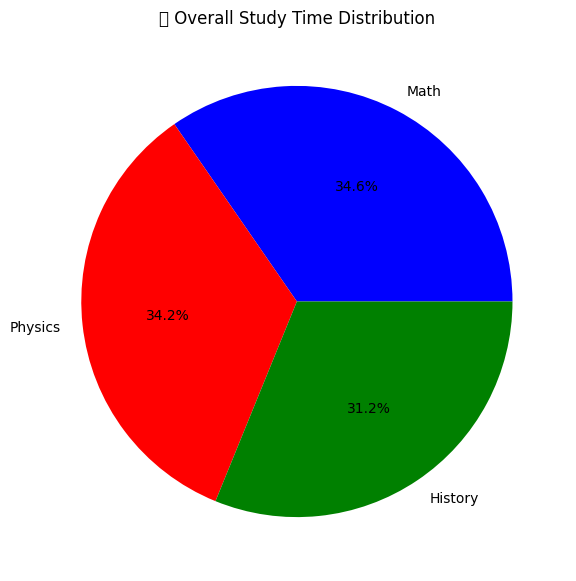

📅 **Your AI-Powered Personalized Study Plan:**

📆 **Day 1 (Total: 4 hours):**
   - Study **Math** for **1.4** hours.
   - Study **Physics** for **1.4** hours.
   - Study **History** for **1.2** hours.
   - ⏸️ Take a break every 2 hours for better focus!

📆 **Day 2 (Total: 5 hours):**
   - Study **Math** for **1.7** hours.
   - Study **Physics** for **1.7** hours.
   - Study **History** for **1.6** hours.
   - ⏸️ Take a break every 2 hours for better focus!

📆 **Day 3 (Total: 6 hours):**
   - Study **Math** for **2.1** hours.
   - Study **Physics** for **2.1** hours.
   - Study **History** for **1.9** hours.
   - ⏸️ Take a break every 2 hours for better focus!

📆 **Day 4 (Total: 7 hours):**
   - Study **Math** for **2.4** hours.
   - Study **Physics** for **2.4** hours.
   - Study **History** for **2.2** hours.
   - ⏸️ Take a break every 2 hours for better focus!

📆 **Day 5 (Total: 8 hours):**
   - Study **Math** for **2.8** hours.
   - Study **Physics** for **2.7** hours.
   - Study **

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def generate_study_schedule(subjects, difficulties, preferred_hours, previous_performance, rf_regressor, total_days, hours_per_day_list):
    if len(hours_per_day_list) != total_days:
        raise ValueError("The length of hours_per_day_list must match total_days")

    total_hours = sum(hours_per_day_list)  # Compute total study hours

    # Prepare input data for model
    input_data = pd.DataFrame({
        'subject_difficulty': difficulties,
        'past_performance': previous_performance,
        'preferred_hours': preferred_hours
    })

    # Predict study hours using trained model
    predicted_hours = rf_regressor.predict(input_data)

    # Normalize predicted hours to fit within total available study hours
    predicted_hours = np.array(predicted_hours)
    predicted_hours = (predicted_hours / predicted_hours.sum()) * total_hours  

    # Split hours across different days dynamically
    study_plan = {day: {} for day in range(1, total_days + 1)}

    for day, daily_hours in enumerate(hours_per_day_list, start=1):
        day_weight = daily_hours / total_hours  # Proportion of total study time for this day
        daily_allocated_hours = predicted_hours * day_weight  # Adjust subject hours for the day

        study_plan[day] = {sub: round(hours, 1) for sub, hours in zip(subjects, daily_allocated_hours)}

    # Generate textual schedule
    schedule = "📅 **Your AI-Powered Personalized Study Plan:**\n"
    for day, subjects_hours in study_plan.items():
        schedule += f"\n📆 **Day {day} (Total: {hours_per_day_list[day-1]} hours):**\n"
        for sub, hours in subjects_hours.items():
            schedule += f"   - Study **{sub}** for **{hours}** hours.\n"
        schedule += "   - ⏸️ Take a break every 2 hours for better focus!\n"

    colors = ['blue', 'red', 'green', 'orange', 'purple']
    # 📊 2. Pie Chart: Subject-Wise Total Study Time Over the Week
    plt.figure(figsize=(7, 7))
    total_subject_hours = {sub: sum(study_plan[day][sub] for day in range(1, total_days + 1)) for sub in subjects}
    plt.pie(total_subject_hours.values(), labels=total_subject_hours.keys(), autopct='%1.1f%%', colors=colors)
    plt.title("📌 Overall Study Time Distribution")
    plt.show()

    return schedule

# Example usage (assuming `rf_regressor` is a trained model)
subjects = ['Math', 'Physics', 'History']
difficulties = [2, 3, 5]  # Higher means harder subject
preferred_hours = [5, 4, 2]  # Preferred study hours per subject
previous_performance = [70, 80, 90]  # Higher means better past performance
total_days = 7  # Study plan for a week
hours_per_day_list = [4, 5, 6, 7, 8, 9, 10]  # Different hours per day

# Ensure `rf_regressor` is trained before calling this function
print(generate_study_schedule(subjects, difficulties, preferred_hours, previous_performance, rf_regressor, total_days, hours_per_day_list))


d:\ML_Study_Planner\dependencies\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


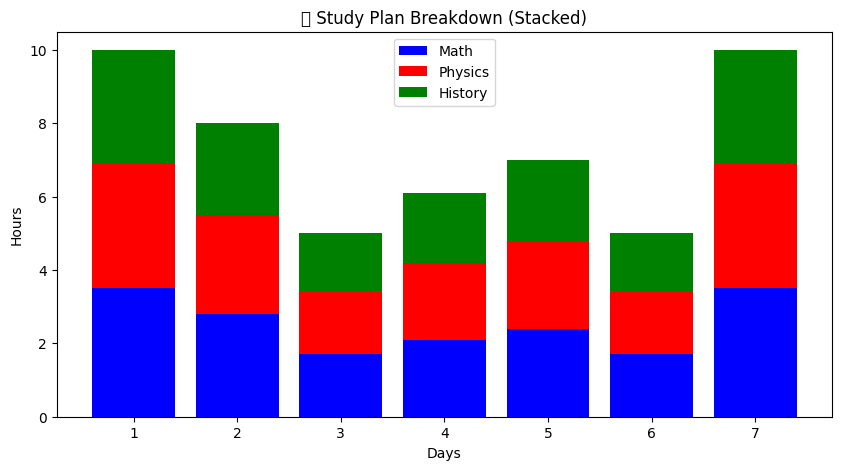

d:\ML_Study_Planner\dependencies\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


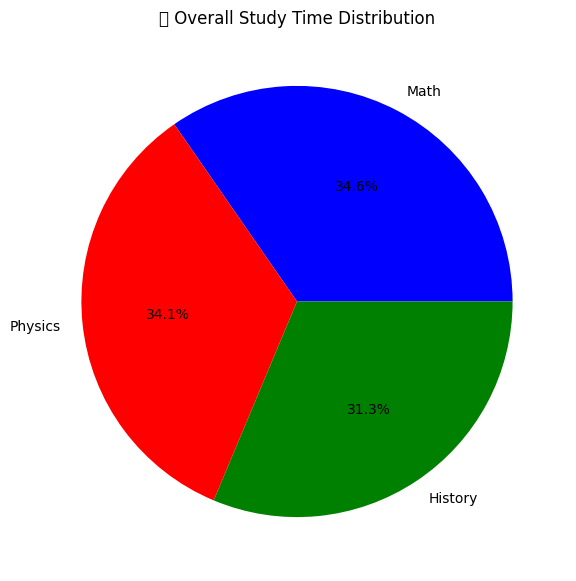

d:\ML_Study_Planner\dependencies\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


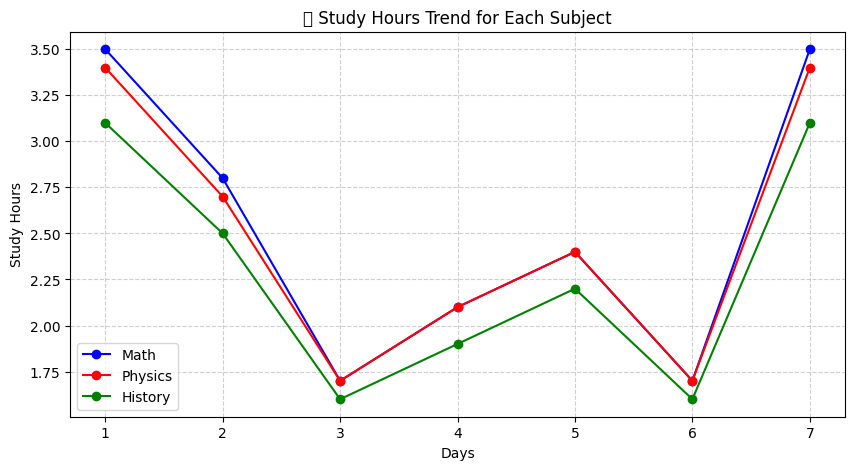

📅 **Your AI-Powered Personalized Study Plan:**

📆 **Day 1 (Total: 10 hours):**
   - Study **Math** for **3.5** hours.
   - Study **Physics** for **3.4** hours.
   - Study **History** for **3.1** hours.
   - ⏸️ Take a break every 2 hours for better focus!

📆 **Day 2 (Total: 8 hours):**
   - Study **Math** for **2.8** hours.
   - Study **Physics** for **2.7** hours.
   - Study **History** for **2.5** hours.
   - ⏸️ Take a break every 2 hours for better focus!

📆 **Day 3 (Total: 5 hours):**
   - Study **Math** for **1.7** hours.
   - Study **Physics** for **1.7** hours.
   - Study **History** for **1.6** hours.
   - ⏸️ Take a break every 2 hours for better focus!

📆 **Day 4 (Total: 6 hours):**
   - Study **Math** for **2.1** hours.
   - Study **Physics** for **2.1** hours.
   - Study **History** for **1.9** hours.
   - ⏸️ Take a break every 2 hours for better focus!

📆 **Day 5 (Total: 7 hours):**
   - Study **Math** for **2.4** hours.
   - Study **Physics** for **2.4** hours.
   - Study *

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def generate_study_schedule(subjects, difficulties, preferred_hours, previous_performance, rf_regressor, total_days, hours_per_day_list):
    if len(hours_per_day_list) != total_days:
        raise ValueError("The length of hours_per_day_list must match total_days")

    total_hours = sum(hours_per_day_list)  # Compute total study hours

    # Prepare input data for model
    input_data = pd.DataFrame({
        'subject_difficulty': difficulties,
        'past_performance': previous_performance,
        'preferred_hours': preferred_hours
    })

    # Predict study hours using trained model
    predicted_hours = rf_regressor.predict(input_data)

    # Normalize predicted hours to fit within total available study hours
    predicted_hours = np.array(predicted_hours)
    predicted_hours = (predicted_hours / predicted_hours.sum()) * total_hours  

    # Split hours across different days dynamically
    study_plan = {day: {} for day in range(1, total_days + 1)}

    for day, daily_hours in enumerate(hours_per_day_list, start=1):
        day_weight = daily_hours / total_hours  # Proportion of total study time for this day
        daily_allocated_hours = predicted_hours * day_weight  # Adjust subject hours for the day

        study_plan[day] = {sub: round(hours, 1) for sub, hours in zip(subjects, daily_allocated_hours)}

    # Generate textual schedule
    schedule = "📅 **Your AI-Powered Personalized Study Plan:**\n"
    for day, subjects_hours in study_plan.items():
        schedule += f"\n📆 **Day {day} (Total: {hours_per_day_list[day-1]} hours):**\n"
        for sub, hours in subjects_hours.items():
            schedule += f"   - Study **{sub}** for **{hours}** hours.\n"
        schedule += "   - ⏸️ Take a break every 2 hours for better focus!\n"

    # =================== 📊 Visualizations =================== #

    # 📊 1. Stacked Bar Chart: Daily Subject-wise Study Time
    plt.figure(figsize=(10, 5))
    bottom = np.zeros(total_days)
    colors = ['blue', 'red', 'green', 'orange', 'purple']

    for i, subject in enumerate(subjects):
        subject_hours = [study_plan[day][subject] for day in range(1, total_days + 1)]
        plt.bar(range(1, total_days + 1), subject_hours, bottom=bottom, label=subject, color=colors[i % len(colors)])
        bottom += np.array(subject_hours)

    plt.xlabel("Days")
    plt.ylabel("Hours")
    plt.title("📊 Study Plan Breakdown (Stacked)")
    plt.xticks(range(1, total_days + 1))
    plt.legend()
    plt.show()

    # 📊 2. Pie Chart: Subject-Wise Total Study Time Over the Week
    plt.figure(figsize=(7, 7))
    total_subject_hours = {sub: sum(study_plan[day][sub] for day in range(1, total_days + 1)) for sub in subjects}
    plt.pie(total_subject_hours.values(), labels=total_subject_hours.keys(), autopct='%1.1f%%', colors=colors)
    plt.title("📌 Overall Study Time Distribution")
    plt.show()

    # 📈 3. Line Plot: Study Hours Per Subject Over Days
    plt.figure(figsize=(10, 5))
    for i, subject in enumerate(subjects):
        subject_hours = [study_plan[day][subject] for day in range(1, total_days + 1)]
        plt.plot(range(1, total_days + 1), subject_hours, marker='o', linestyle='-', label=subject, color=colors[i % len(colors)])

    plt.xlabel("Days")
    plt.ylabel("Study Hours")
    plt.title("📈 Study Hours Trend for Each Subject")
    plt.xticks(range(1, total_days + 1))
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

    return schedule

# Example usage (assuming `rf_regressor` is a trained model)
subjects = ['Math', 'Physics', 'History']
difficulties = [2, 3, 5]  # Higher means harder subject
preferred_hours = [5, 4, 2]  # Preferred study hours per subject
previous_performance = [70, 80, 90]  # Higher means better past performance
total_days = 7  # Study plan for a week
hours_per_day_list = [10,8,5,6,7,5,10]  # Different hours per day

# Ensure `rf_regressor` is trained before calling this function
print(generate_study_schedule(subjects, difficulties, preferred_hours, previous_performance, rf_regressor, total_days, hours_per_day_list))


d:\ML_Study_Planner\dependencies\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


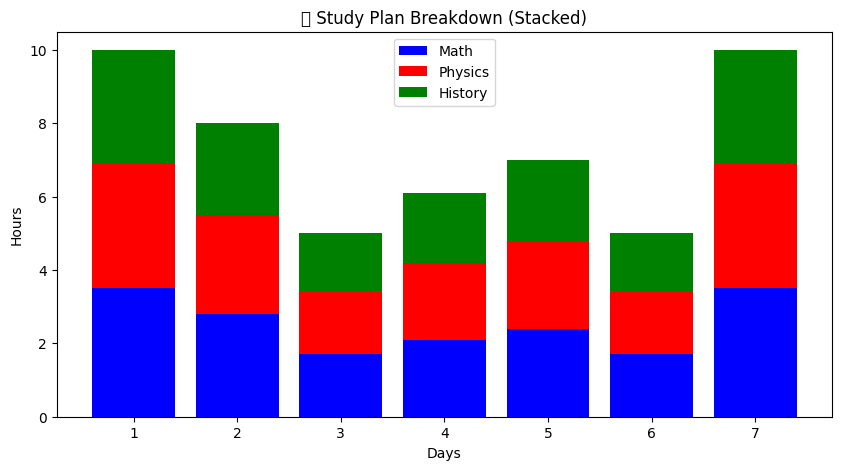

d:\ML_Study_Planner\dependencies\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


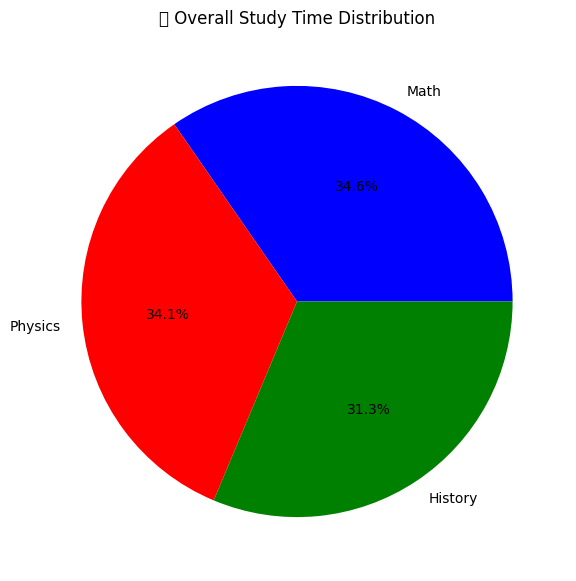

d:\ML_Study_Planner\dependencies\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


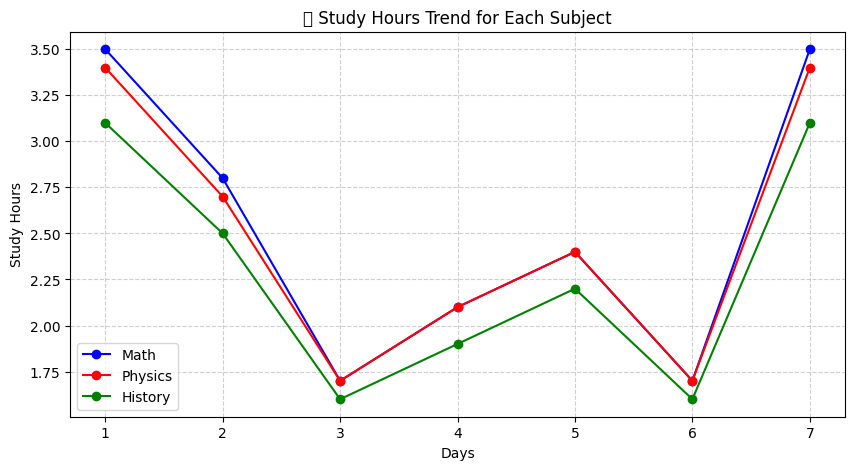

📅 Your AI-Powered Personalized Study Plan:

📆 Day 1 (Total: 10 hours):
   - Study **Math** for **3.5** hours.
   - Study **Physics** for **3.4** hours.
   - Study **History** for **3.1** hours.
   - 💡Push yourself, because no one else is going to do it for you.

📆 Day 2 (Total: 8 hours):
   - Study **Math** for **2.8** hours.
   - Study **Physics** for **2.7** hours.
   - Study **History** for **2.5** hours.
   - ⚡The future depends on what you do today.

📆 Day 3 (Total: 5 hours):
   - Study **Math** for **1.7** hours.
   - Study **Physics** for **1.7** hours.
   - Study **History** for **1.6** hours.
   - ⚡Your limitation—it's only your imagination.

📆 Day 4 (Total: 6 hours):
   - Study **Math** for **2.1** hours.
   - Study **Physics** for **2.1** hours.
   - Study **History** for **1.9** hours.
   - 💡Don't watch the clock,do what it does. Keep going.

📆 Day 5 (Total: 7 hours):
   - Study **Math** for **2.4** hours.
   - Study **Physics** for **2.4** hours.
   - Study **History** for

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def generate_study_schedule(subjects, difficulties, preferred_hours, previous_performance, rf_regressor, total_days, hours_per_day_list):
    if len(hours_per_day_list) != total_days:
        raise ValueError("The length of hours_per_day_list must match total_days")

    total_hours = sum(hours_per_day_list)  # Compute total study hours

    # Prepare input data for model
    input_data = pd.DataFrame({
        'subject_difficulty': difficulties,
        'past_performance': previous_performance,
        'preferred_hours': preferred_hours
    })

    # Predict study hours using trained model
    predicted_hours = rf_regressor.predict(input_data)

    # Normalize predicted hours to fit within total available study hours
    predicted_hours = np.array(predicted_hours)
    predicted_hours = (predicted_hours / predicted_hours.sum()) * total_hours  

    # Split hours across different days dynamically
    study_plan = {day: {} for day in range(1, total_days + 1)}

    for day, daily_hours in enumerate(hours_per_day_list, start=1):
        day_weight = daily_hours / total_hours  # Proportion of total study time for this day
        daily_allocated_hours = predicted_hours * day_weight  # Adjust subject hours for the day

        study_plan[day] = {sub: round(hours, 1) for sub, hours in zip(subjects, daily_allocated_hours)}

    # Motivational quotes
    quotes = [
        "⚡Success is the sum of small efforts, repeated day in and day out.",
        "💡Don't watch the clock,do what it does. Keep going.",
        "⚡The future depends on what you do today.",
        "💡Believe you can and you're halfway there.",
        "⚡Your limitation—it's only your imagination.",
        "💡Push yourself, because no one else is going to do it for you.",
        "⚡Great things never come from comfort zones."
    ]

    # Generate textual schedule
    schedule = "\U0001F4C5 Your AI-Powered Personalized Study Plan:\n"
    for day, subjects_hours in study_plan.items():
        schedule += f"\n\U0001F4C6 Day {day} (Total: {hours_per_day_list[day-1]} hours):\n"
        for sub, hours in subjects_hours.items():
            schedule += f"   - Study **{sub}** for **{hours}** hours.\n"
        schedule += f"   - {np.random.choice(quotes)}\n"

    # =================== \U0001F4CA Visualizations =================== #

    # \U0001F4CA 1. Stacked Bar Chart: Daily Subject-wise Study Time
    plt.figure(figsize=(10, 5))
    bottom = np.zeros(total_days)
    colors = ['blue', 'red', 'green', 'orange', 'purple']

    for i, subject in enumerate(subjects):
        subject_hours = [study_plan[day][subject] for day in range(1, total_days + 1)]
        plt.bar(range(1, total_days + 1), subject_hours, bottom=bottom, label=subject, color=colors[i % len(colors)])
        bottom += np.array(subject_hours)

    plt.xlabel("Days")
    plt.ylabel("Hours")
    plt.title("\U0001F4CA Study Plan Breakdown (Stacked)")
    plt.xticks(range(1, total_days + 1))
    plt.legend()
    plt.show()

    # \U0001F4CA 2. Pie Chart: Subject-Wise Total Study Time Over the Week
    plt.figure(figsize=(7, 7))
    total_subject_hours = {sub: sum(study_plan[day][sub] for day in range(1, total_days + 1)) for sub in subjects}
    plt.pie(total_subject_hours.values(), labels=total_subject_hours.keys(), autopct='%1.1f%%', colors=colors)
    plt.title("\U0001F4CC Overall Study Time Distribution")
    plt.show()

    # \U0001F4C8 3. Line Plot: Study Hours Per Subject Over Days
    plt.figure(figsize=(10, 5))
    for i, subject in enumerate(subjects):
        subject_hours = [study_plan[day][subject] for day in range(1, total_days + 1)]
        plt.plot(range(1, total_days + 1), subject_hours, marker='o', linestyle='-', label=subject, color=colors[i % len(colors)])

    plt.xlabel("Days")
    plt.ylabel("Study Hours")
    plt.title("\U0001F4C8 Study Hours Trend for Each Subject")
    plt.xticks(range(1, total_days + 1))
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

    return schedule

# Example usage (assuming `rf_regressor` is a trained model)
subjects = ['Math', 'Physics', 'History']
difficulties = [2, 3, 5]  # Higher means harder subject
preferred_hours = [5, 4, 2]  # Preferred study hours per subject
previous_performance = [70, 80, 90]  # Higher means better past performance
total_days = 7  # Study plan for a week
hours_per_day_list = [10,8,5,6,7,5,10]  # Different hours per day

# Ensure `rf_regressor` is trained before calling this function
print(generate_study_schedule(subjects, difficulties, preferred_hours, previous_performance, rf_regressor, total_days, hours_per_day_list))

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer

def analyze_user_input(user_input, subjects):
    nltk.download('punkt')
    vectorizer = CountVectorizer()
    tokens = word_tokenize(user_input.lower())
    
    strengths = []
    weaknesses = []
    for subject in subjects:
        if subject.lower() in tokens:
            if 'weak' in tokens or 'bad' in tokens:
                weaknesses.append(subject)
            elif 'strong' in tokens or 'good' in tokens:
                strengths.append(subject)
    
    return strengths, weaknesses

def generate_study_schedule(user_input, subjects, difficulties, preferred_hours, previous_performance, rf_regressor, total_days, hours_per_day_list):
    if len(hours_per_day_list) != total_days:
        raise ValueError("The length of hours_per_day_list must match total_days")

    total_hours = sum(hours_per_day_list)  # Compute total study hours

    strengths, weaknesses = analyze_user_input(user_input, subjects)
    
    # Modify difficulties based on user input
    for i, subject in enumerate(subjects):
        if subject in strengths:
            difficulties[i] = max(1, difficulties[i] - 1)
        elif subject in weaknesses:
            difficulties[i] = min(5, difficulties[i] + 1)
    
    # Prepare input data for model
    input_data = pd.DataFrame({
        'subject_difficulty': difficulties,
        'past_performance': previous_performance,
        'preferred_hours': preferred_hours
    })

    # Predict study hours using trained model
    predicted_hours = rf_regressor.predict(input_data)

    # Normalize predicted hours to fit within total available study hours
    predicted_hours = np.array(predicted_hours)
    predicted_hours = (predicted_hours / predicted_hours.sum()) * total_hours  

    # Split hours across different days dynamically
    study_plan = {day: {} for day in range(1, total_days + 1)}

    for day, daily_hours in enumerate(hours_per_day_list, start=1):
        day_weight = daily_hours / total_hours  # Proportion of total study time for this day
        daily_allocated_hours = predicted_hours * day_weight  # Adjust subject hours for the day

        study_plan[day] = {sub: round(hours, 1) for sub, hours in zip(subjects, daily_allocated_hours)}

    # Motivational quotes
    quotes = [
        "Success is the sum of small efforts, repeated day in and day out.",
        "Don't watch the clock; do what it does. Keep going.",
        "The future depends on what you do today.",
        "Believe you can and you're halfway there.",
        "Your limitation—it's only your imagination.",
        "Push yourself, because no one else is going to do it for you.",
        "Great things never come from comfort zones."
    ]

    # Generate textual schedule
    schedule = "\U0001F4C5 **Your AI-Powered Personalized Study Plan:**\n"
    for day, subjects_hours in study_plan.items():
        schedule += f"\n\U0001F4C6 **Day {day} (Total: {hours_per_day_list[day-1]} hours):**\n"
        for sub, hours in subjects_hours.items():
            schedule += f"   - Study **{sub}** for **{hours}** hours.\n"
        schedule += f"   - \U0001F4A1 {np.random.choice(quotes)}\n"

    return schedule

# Example usage (assuming `rf_regressor` is a trained model)
user_input = "I'm strong in History and Physics and weak at Math"
subjects = ['Math', 'Physics', 'History']
difficulties = [2, 3, 5]  # Higher means harder subject
preferred_hours = [5, 4, 2]  # Preferred study hours per subject
previous_performance = [70, 80, 90]  # Higher means better past performance
total_days = 7  # Study plan for a week
hours_per_day_list = [10,8,5,6,7,5,10]  # Different hours per day

# Ensure `rf_regressor` is trained before calling this function
print(generate_study_schedule(user_input, subjects, difficulties, preferred_hours, previous_performance, rf_regressor, total_days, hours_per_day_list))


📅 **Your AI-Powered Personalized Study Plan:**

📆 **Day 1 (Total: 10 hours):**
   - Study **Math** for **3.5** hours.
   - Study **Physics** for **3.4** hours.
   - Study **History** for **3.1** hours.
   - 💡 Success is the sum of small efforts, repeated day in and day out.

📆 **Day 2 (Total: 8 hours):**
   - Study **Math** for **2.8** hours.
   - Study **Physics** for **2.7** hours.
   - Study **History** for **2.5** hours.
   - 💡 Your limitation—it's only your imagination.

📆 **Day 3 (Total: 5 hours):**
   - Study **Math** for **1.7** hours.
   - Study **Physics** for **1.7** hours.
   - Study **History** for **1.6** hours.
   - 💡 Great things never come from comfort zones.

📆 **Day 4 (Total: 6 hours):**
   - Study **Math** for **2.1** hours.
   - Study **Physics** for **2.1** hours.
   - Study **History** for **1.9** hours.
   - 💡 Believe you can and you're halfway there.

📆 **Day 5 (Total: 7 hours):**
   - Study **Math** for **2.4** hours.
   - Study **Physics** for **2.4** hours.


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\himen\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer

def analyze_user_input(user_input, subjects):
    nltk.download('punkt')
    vectorizer = CountVectorizer()
    tokens = word_tokenize(user_input.lower())
    
    strengths = []
    weaknesses = []
    for subject in subjects:
        if subject.lower() in tokens:
            if 'weak' in tokens or 'bad' in tokens:
                weaknesses.append(subject)
            elif 'strong' in tokens or 'good' in tokens:
                strengths.append(subject)
    
    return strengths, weaknesses

def adjust_schedule_for_missed_days(study_plan, hours_per_day_list, missed_days):
    total_missed_hours = sum(hours_per_day_list[day - 1] for day in missed_days)
    remaining_days = [day for day in range(1, len(hours_per_day_list) + 1) if day not in missed_days]
    
    for day in remaining_days:
        hours_per_day_list[day - 1] += total_missed_hours / len(remaining_days)
    
    return hours_per_day_list

def generate_study_schedule(user_input, subjects, difficulties, preferred_hours, previous_performance, rf_regressor, total_days, hours_per_day_list, missed_days=[]):
    if len(hours_per_day_list) != total_days:
        raise ValueError("The length of hours_per_day_list must match total_days")
    
    if missed_days:
        hours_per_day_list = adjust_schedule_for_missed_days({}, hours_per_day_list, missed_days)
    
    total_hours = sum(hours_per_day_list)
    strengths, weaknesses = analyze_user_input(user_input, subjects)
    
    for i, subject in enumerate(subjects):
        if subject in strengths:
            difficulties[i] = max(1, difficulties[i] - 1)
        elif subject in weaknesses:
            difficulties[i] = min(5, difficulties[i] + 1)
    
    input_data = pd.DataFrame({
        'subject_difficulty': difficulties,
        'past_performance': previous_performance,
        'preferred_hours': preferred_hours
    })

    predicted_hours = rf_regressor.predict(input_data)
    predicted_hours = (predicted_hours / predicted_hours.sum()) * total_hours

    study_plan = {day: {} for day in range(1, total_days + 1)}

    for day, daily_hours in enumerate(hours_per_day_list, start=1):
        day_weight = daily_hours / total_hours
        daily_allocated_hours = predicted_hours * day_weight
        study_plan[day] = {sub: round(hours, 1) for sub, hours in zip(subjects, daily_allocated_hours)}

    quotes = [
        "Success is the sum of small efforts, repeated day in and day out.",
        "Don't watch the clock; do what it does. Keep going.",
        "The future depends on what you do today.",
        "Believe you can and you're halfway there.",
        "Your limitation—it's only your imagination.",
        "Push yourself, because no one else is going to do it for you.",
        "Great things never come from comfort zones."
    ]

    schedule = "\U0001F4C5 **Your AI-Powered Personalized Study Plan:**\n"
    for day, subjects_hours in study_plan.items():
        schedule += f"\n\U0001F4C6 **Day {day} (Total: {hours_per_day_list[day-1]} hours):**\n"
        for sub, hours in subjects_hours.items():
            schedule += f"   - Study **{sub}** for **{hours}** hours.\n"
        schedule += f"   - \U0001F4A1 {np.random.choice(quotes)}\n"

    return schedule

# Example usage (assuming `rf_regressor` is a trained model)
user_input = "I'm strong in Math and bad at History."
subjects = ['Math', 'Physics', 'History']
difficulties = [2, 3, 5]
preferred_hours = [5, 4, 2]
previous_performance = [70, 80, 90]
total_days = 7
hours_per_day_list = [10, 8, 5, 6, 7, 5, 10]
missed_days = [2, 5]  # Example missed days

# Ensure `rf_regressor` is trained before calling this function
print(generate_study_schedule(user_input, subjects, difficulties, preferred_hours, previous_performance, rf_regressor, total_days, hours_per_day_list, missed_days))


📅 **Your AI-Powered Personalized Study Plan:**

📆 **Day 1 (Total: 13.0 hours):**
   - Study **Math** for **4.5** hours.
   - Study **Physics** for **4.4** hours.
   - Study **History** for **4.0** hours.
   - 💡 Success is the sum of small efforts, repeated day in and day out.

📆 **Day 2 (Total: 8 hours):**
   - Study **Math** for **2.8** hours.
   - Study **Physics** for **2.7** hours.
   - Study **History** for **2.5** hours.
   - 💡 The future depends on what you do today.

📆 **Day 3 (Total: 8.0 hours):**
   - Study **Math** for **2.8** hours.
   - Study **Physics** for **2.7** hours.
   - Study **History** for **2.5** hours.
   - 💡 The future depends on what you do today.

📆 **Day 4 (Total: 9.0 hours):**
   - Study **Math** for **3.1** hours.
   - Study **Physics** for **3.1** hours.
   - Study **History** for **2.8** hours.
   - 💡 Success is the sum of small efforts, repeated day in and day out.

📆 **Day 5 (Total: 7 hours):**
   - Study **Math** for **2.4** hours.
   - Study **Physi

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\himen\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
